In [4]:
data_root = "/home/wg25r/tracking-dataset/dataset/personpath22/raw_data"

In [ ]:
import os
os.listdir(data_root)

In [18]:
import pybgs as bgs
import cv2
import os
os.makedirs("/home/wg25r/fastdata/noisy_meow/in/", exist_ok=True)
os.makedirs("/home/wg25r/fastdata/noisy_meow/long/", exist_ok=True)
os.makedirs("/home/wg25r/fastdata/noisy_meow/short/", exist_ok=True)

import tqdm 

def process(video):
    short_bgs = cv2.createBackgroundSubtractorMOG2(history=30) 
    # long_bgs = bgs.SuBSENSE()
    long_bgs = cv2.createBackgroundSubtractorMOG2(history=300) 

    index = 0
    video_path = os.path.join(data_root, video)
    cap = cv2.VideoCapture(video_path)
    bar = tqdm.tqdm(total=int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
    while True:
        ret, frame = cap.read()
        bar.update(1)
        if not ret:
            break
        
        frame = cv2.resize(frame, (512, 512))
        short_bgs.apply(frame)
        short_bg = short_bgs.getBackgroundImage()
        
        long_bgs.apply(frame)
        long_bg = long_bgs.getBackgroundImage()

 
        index += 1

        
        cv2.imwrite(f"/home/wg25r/fastdata/noisy_meow/in/{video}_{index}.png", frame) 
        cv2.imwrite(f"/home/wg25r/fastdata/noisy_meow/short/{video}_{index}.png", short_bg)
        cv2.imwrite(f"/home/wg25r/fastdata/noisy_meow/long/{video}_{index}.png", long_bg)
        
    print(f"done {video}")

process(os.listdir(data_root)[0]) 

566it [00:42, 13.40it/s]

done uid_vid_00173.mp4


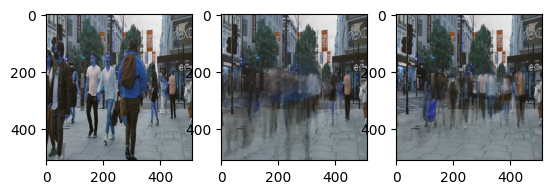

: 

In [ ]:
import pylab
idx = -1 
images = sorted(os.listdir("/home/wg25r/fastdata/noisy_meow/short/"))
pylab.subplot(1, 3, 1)
pylab.imshow(cv2.imread(f"/home/wg25r/fastdata/noisy_meow/in/{images[idx]}"))
pylab.subplot(1, 3, 2)
pylab.imshow(cv2.imread(f"/home/wg25r/fastdata/noisy_meow/short/{images[idx]}"))
pylab.subplot(1, 3, 3)
pylab.imshow(cv2.imread(f"/home/wg25r/fastdata/noisy_meow/long/{images[idx]}")) 